In [1]:
import datetime as dt  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

In [2]:
# Load the data
calls = pd.read_csv('../data/callsforservicefiltered.csv', header=0, low_memory=True, 
                    memory_map=True)
print(len(calls))
#calls.dtypes

1124451


C:\Users\ltran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Clean Up

In [3]:
# Filter out rows where cancelled calls field = True, report only field = True.

calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1101654


In [4]:
# Filter out rows where nature = Transport to Animal Shelter.

calls = calls[calls.nature != 'TRANSPORT TO ANIMAL SHELTER']
print(len(calls))

1083514


In [5]:
# Filter out "Traffic Stop" because the response time is relevant since it does not get call from dispather
calls = calls[calls.nature != 'TRAFFIC STOP']
print(len(calls))

969028


In [6]:
# Filter out "911 UNKNOWN" calls since this could not be classified
calls = calls[calls.nature != '911 UNKNOWN']
print(len(calls))

965217


In [7]:
calls.isnull().sum()

calltime           0
callsource         3
city             502
nature             0
nature2       935611
priority         245
rptonly            0
service            0
agency             0
district       81525
statbeat       81523
ra             81528
gp             84358
primeunit        411
cancelled          0
closecode          0
timeclose          0
calldow            0
secs2rt            0
secs2di            0
secs2en            0
secs2ar            0
secs2tr            0
secs2lc            0
secsdi2en          0
secsdi2ar          0
secsar2tr          0
secsar2lc          0
secsrt2dsp         0
secstr2lc          0
firstdisp        642
dtype: int64

In [8]:
#Remove unnessessary columns
calls.drop(columns = ['statbeat','ra'], inplace=True)
calls

,calltime,callsource,city,nature,nature2,priority,rptonly,service,agency,district,...,secs2ar,secs2tr,secs2lc,secsdi2en,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp
1,2012-07-01T00:09:07Z,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,...,571,2059,3025,48,393,1881,2454,43,965,M261
3,2012-07-01T00:15:56Z,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,...,915,1519,5437,45,854,1457,4522,30,3918,M2
4,2012-07-01T00:17:20Z,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,...,685,0,1586,279,677,0,900,8,0,E44
5,2012-07-01T00:19:24Z,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,...,0,0,339,23,0,0,0,10,0,M241
6,2012-07-01T00:24:42Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,...,306,1335,2602,22,224,1253,2295,29,1267,M211
8,2012-07-01T00:30:03Z,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,...,340,1107,2430,47,277,1043,2090,17,1323,M221
9,2012-07-01T00:33:11Z,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,...,1148,0,2257,105,290,0,1109,102,0,S314
10,2012-07-01T00:37:41Z,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,...,0,0,3734,0,0,0,3734,0,0,S324
11,2012-07-01T00:46:35Z,E911,G,BREATHING PROBLEMS,NaN,1,False,EMS,EMS,B6,...,689,0,1200,26,604,0,511,56,0,MA32
12,2012-07-01T00:47:14Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B6,...,323,753,2339,21,210,640,2015,37,1585,MA32


In [9]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature']!=x['nature2']
                        else x['nature'] for i,x in calls.iterrows()]
calls = calls.drop(columns = ['nature','nature2'])
calls = calls.rename(columns={'actualnature' : 'nature'})

In [10]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
4,E911,W,P,False,FIRE,GCF,ALAM,44C,E44,False,...,0,900,8,0,E44,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0
9,PHONE,SU,1,False,LAW,GCSD,SD1,SD12,S314,False,...,0,1109,102,0,S314,DOMESTIC DISPUTE,2012,7,1,0
10,SELF,G,2,False,LAW,GCSD,GPD1,P110,S324,False,...,0,3734,0,0,S324,LEGAL PAPER / COMPLAINT,2012,7,1,0
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,0,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,640,2015,37,1585,MA32,SICK PERSON,2012,7,1,0


In [11]:
calls.isnull().sum()

callsource        3
city            502
priority        245
rptonly           0
service           0
agency            0
district      81525
gp            84358
primeunit       411
cancelled         0
closecode         0
dayOfWeek         0
secs2rt           0
secs2di           0
secs2en           0
secs2ar           0
secs2tr           0
secs2lc           0
secsdi2en         0
secsdi2ar         0
secsar2tr         0
secsar2lc         0
secsrt2dsp        0
secstr2lc         0
firstdisp       642
nature            0
year              0
month             0
dayOfMonth        0
hour              0
dtype: int64

In [12]:
# split the data up by agency
ems_calls = calls[calls.agency == 'EMS']
aco_calls = calls[calls.agency == 'ACO']
gcsd_calls = calls[calls.agency == 'GCSD']
gcf_calls = calls[calls.agency == 'GCF']

In [13]:
ems_calls.isnull().sum()

callsource       1
city           149
priority        35
rptonly          0
service          0
agency           0
district       769
gp            1650
primeunit      228
cancelled        0
closecode        0
dayOfWeek        0
secs2rt          0
secs2di          0
secs2en          0
secs2ar          0
secs2tr          0
secs2lc          0
secsdi2en        0
secsdi2ar        0
secsar2tr        0
secsar2lc        0
secsrt2dsp       0
secstr2lc        0
firstdisp      337
nature           0
year             0
month            0
dayOfMonth       0
hour             0
dtype: int64

# Progress report 3

# Data Anayltics Nature Vs. Response time!
## Goals:
### - Basic statistics and clean data some more for our purposes
### - Check the Distribution of the of response time and see patterns
### - Check Relationships of response time and  number of calls
### - Check Relationships of response time and month of the years

###  1.1 EMS - Guilford county Emergency Medical Service

In [30]:
ems_groupby_nature_size = ems_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
ems_groupby_nature_size
#ems_groupby_nature_size


,nature,second
0,SICK PERSON,64109
1,FALLS-BACK INJURIES(TRAUMATIC),54876
2,BREATHING PROBLEMS,40025
3,CONVALESCENT TRANSPORT,31732
4,CHEST PAIN,30974
5,UNCONSCIOUS-FAINTING,28620
6,ACCIDENT WITH PERSONAL INJURY,25774
7,EMS RESPONSE - NON EMERGENCY,21177
8,SEIZURES-CONVULSIONS,15845
9,TRANSFER INTERFACILITY,15239


In [31]:
ems_groupby_nature_mean = ems_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
ems_groupby_nature_mean

,nature,second_avg
0,HAZMAT,274.000000
1,EMS TACTICAL CALL,218.853211
2,ACCIDENT PI W/TRACTOR TRAILER,107.000000
3,HOSPICE TRANSPORT,79.956897
4,DEAD BODY TRANSPORT-PTAR ONLY,50.050462
5,TRANSPORT ONLY- MED FACILITY,49.150039
6,AIR ALERT 3 SMALL AIRCRAFT,46.666667
7,ASSIST PATIENT,39.026596
8,DISORDERLY SUBJECT OR CROWD,39.000000
9,AIR ALERT 1 SMALL AIRCRAFT,36.773585


In [43]:
ems_merged = pd.merge(ems_groupby_nature_size,ems_groupby_nature_mean,on='nature')
ems_merged

,nature,second,second_avg
0,SICK PERSON,64109,31.463726
1,FALLS-BACK INJURIES(TRAUMATIC),54876,30.346672
2,BREATHING PROBLEMS,40025,29.235403
3,CONVALESCENT TRANSPORT,31732,35.594258
4,CHEST PAIN,30974,29.116969
5,UNCONSCIOUS-FAINTING,28620,29.031342
6,ACCIDENT WITH PERSONAL INJURY,25774,28.231823
7,EMS RESPONSE - NON EMERGENCY,21177,32.660811
8,SEIZURES-CONVULSIONS,15845,28.814516
9,TRANSFER INTERFACILITY,15239,31.984645


In [44]:
ems_merged["second"].describe()


count       91.000000
mean      5229.659341
std      11453.974392
min          1.000000
25%          4.000000
50%        206.000000
75%       4038.500000
max      64109.000000
Name: second, dtype: float64

In [45]:
#correlation_matrix = ems_groupby_nature_mean.corr().round(2)

In [ ]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
#sns.heatmap(data=correlation_matrix, annot=True)

### 1.2 EMS - Find Outlier

In [46]:
# IQR
iqr_ems = ems_merged["second"].quantile(0.75) - ems_merged["second"].quantile(0.25)
iqr_ems



4034.5

In [47]:
# median
median_size_ems = ems_merged["second"].quantile(0.50)
median_size_ems


206.0

In [48]:
# lower outlier bound
lower_outlier_bound_ems = ems_merged["second"].quantile(0.25) - 1.5 * iqr_ems
lower_outlier_bound_ems

-6047.75

In [49]:
# upper outlier bound
upper_outlier_boud_ems = ems_merged["second"].quantile(0.75) +  1.5 * iqr_ems
upper_outlier_boud_ems


10090.25

In [50]:
# new data range after outlier has been removed
ems_outlier_removed = ems_merged[(ems_merged['second'] > lower_outlier_bound_ems) & (ems_merged['second'] < upper_outlier_boud_ems) ]
ems_outlier_removed


,nature,second,second_avg
15,STROKE (CVA),9287,28.920103
16,OVERDOSE-INGESTION-POISONING,8316,30.216450
17,TRAUMATIC INJURIES - SPECIFIC,6514,29.690973
18,HEART PROBLEMS,5824,29.494677
19,ASSAULT / RAPE,5385,30.992201
20,EMS ASSISTANCE NEEDED,5377,33.505300
21,CARDIAC / RESPIRATORY ARREST,5248,28.243902
22,ALLERGIES-HIVES-STINGS,4166,30.002400
23,BACK PAIN (NON-TRAUMATIC),3911,31.434160
24,PREGNANCY-CHILDBIRTH-MISCARRY,3686,29.780250


### 1.3 EMS - Graph

In [51]:
print (ems_outlier_removed['second'].corr(ems_outlier_removed['second_avg']))

-0.022926996921802004


Text(0,0.5,'second')

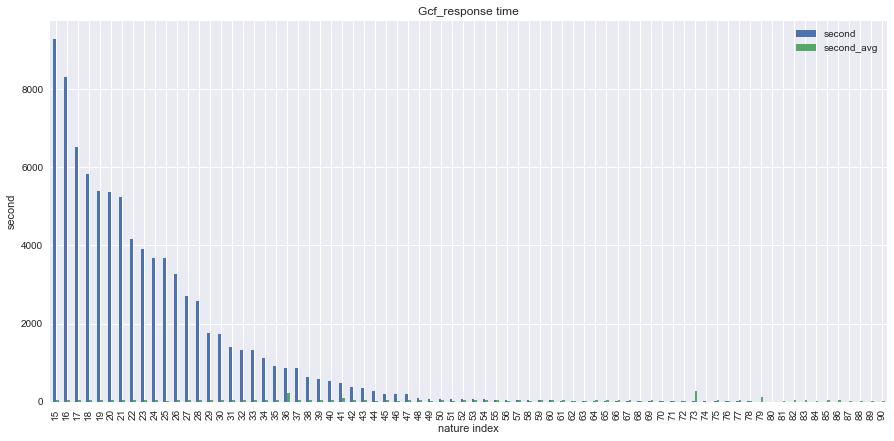

In [52]:
ems_plot = ems_outlier_removed.plot(kind='bar', title = "Gcf_response time", figsize=(15,7))
ems_plot.set_xlabel("nature index")
ems_plot.set_ylabel("second")

Text(0.7,4034.5,'IQR')

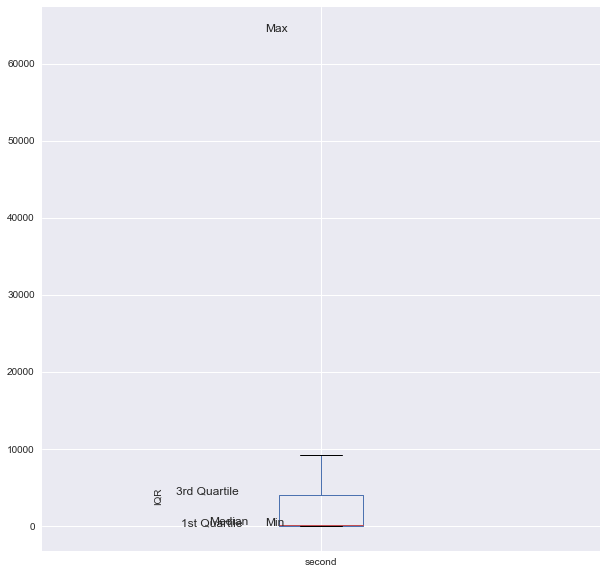

In [53]:
ems_merged.boxplot(column="second",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=ems_merged["second"].quantile(0.75), s="3rd Quartile")
plt.text(x=0.8, y=ems_merged["second"].quantile(0.50), s="Median")
plt.text(x=0.75, y=ems_merged["second"].quantile(0.25), s="1st Quartile")
plt.text(x=0.9, y=ems_merged["second"].quantile(0), s="Min")
plt.text(x=0.9, y=ems_merged["second"].quantile(1), s="Max")
plt.text(x=0.7, y=iqr_ems, s="IQR", rotation=90, size=10)

Text(0,0.5,'second')

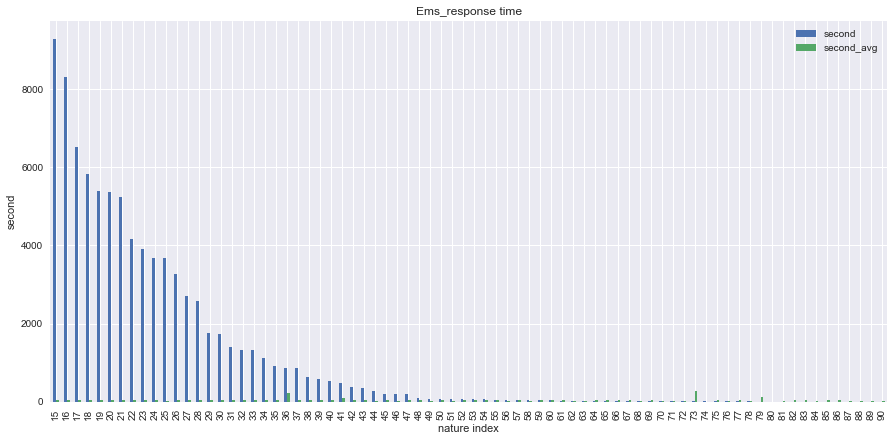

In [54]:

#plt.xticks( site2['Cl'], site2.index.values ) # location, labels
#plt.plot( site2['Cl'] )
#plt.show()



ems_plot = ems_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
ems_plot.set_xlabel("nature index")
ems_plot.set_ylabel("second")


In [55]:
ems_outlier_removed['second'].corr(ems_outlier_removed['second'])

1.0

### 2.1 ACO - Animal control

In [ ]:
aco_groupby_nature_size = aco_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
aco_groupby_nature_size

In [ ]:
aco_groupby_nature_mean = aco_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
aco_groupby_nature_mean

In [ ]:
# mergering 
aco_merged = pd.merge(aco_groupby_nature_size,aco_groupby_nature_mean,on='nature')
aco_merged

In [ ]:
aco_merged["second"].describe()

### 2.2 ACO - Find Outlier

In [ ]:
# IQR
iqr_aco = aco_merged["second"].quantile(0.75) - aco_merged["second"].quantile(0.25)
iqr_aco

In [ ]:
# median
median_size_aco = aco_merged["second"].quantile(0.50)
median_size_aco

In [ ]:
# upper outlier bound
upper_outlier_bound_aco = ems_merged["second"].quantile(0.75) +  1.5 * iqr_aco
upper_outlier_bound_aco

In [ ]:
# lower outlier bound
lower_outlier_bound_aco = aco_merged["second"].quantile(0.25) - 1.5 * iqr_aco
lower_outlier_bound_aco

In [ ]:
# new data range after outlier has been removed
aco_outlier_removed = aco_merged[(aco_merged['second'] > lower_outlier_bound_aco) & (aco_merged['second'] < upper_outlier_bound_aco) ]
aco_outlier_removed

### 2.3 ACO graph

In [ ]:
aco_merged.boxplot(column="second",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=aco_merged["second"].quantile(0.75), s="3rd Quartile")
plt.text(x=0.8, y=aco_merged["second"].quantile(0.50), s="Median")
plt.text(x=0.75, y=aco_merged["second"].quantile(0.25), s="1st Quartile")
plt.text(x=0.9, y=aco_merged["second"].quantile(0), s="Min")
plt.text(x=0.9, y=aco_merged["second"].quantile(1), s="Max")
plt.text(x=0.7, y=iqr_aco, s="IQR", rotation=90, size=10)

In [ ]:
aco_plot = aco_outlier_removed.plot(kind='bar', title = "ACO_response time", figsize=(15,7))
aco_plot.set_xlabel("nature index")
aco_plot.set_ylabel("second")

### 3.1 GCSD -Guilford County Sheriff Department

In [ ]:
gcsd_groupby_nature_size = gcsd_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
gcsd_groupby_nature_size

In [ ]:
gcsd_groupby_nature_mean = gcsd_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
gcsd_groupby_nature_mean

In [ ]:
# mergering 
gcsd_merged = pd.merge(aco_groupby_nature_size,aco_groupby_nature_mean,on='nature')
gcsd_merged

In [ ]:
gcsd_merged["second"].describe()

### 3.2 GCSD - outlier

In [ ]:
# IQR
iqr_gcsd = gcsd_merged["second"].quantile(0.75) - gcsd_merged["second"].quantile(0.25)
iqr_gcsd

In [ ]:
# median
median_size_gcsd = gcsd_merged["second"].quantile(0.50)
median_size_gcsd

In [ ]:
# lower outlier bound
lower_outlier_bound_gcsd = gcsd_merged["second"].quantile(0.25) - 1.5 * iqr_gcsd
lower_outlier_bound_gcsd

In [ ]:
# upper outlier bound
upper_outlier_boud_gcsd = gcsd_merged["second"].quantile(0.75) +  1.5 * iqr_gcsd
upper_outlier_boud_gcsd

In [ ]:
# new data range after outlier has been removed
gcsd_outlier_removed = gcsd_merged[(gcsd_merged['second'] > lower_outlier_bound_gcsd) & (gcsd_merged['second'] < upper_outlier_boud_gcsd) ]
gcsd_outlier_removed

### 3.3 GCSD - graph

In [ ]:
gcsd_merged.boxplot(column="second",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=gcsd_merged["second"].quantile(0.75), s="3rd Quartile")
plt.text(x=0.8, y=gcsd_merged["second"].quantile(0.50), s="Median")
plt.text(x=0.75, y=gcsd_merged["second"].quantile(0.25), s="1st Quartile")
plt.text(x=0.9, y=gcsd_merged["second"].quantile(0), s="Min")
plt.text(x=0.9, y=gcsd_merged["second"].quantile(1), s="Max")
plt.text(x=0.7, y=iqr_gcsd, s="IQR", rotation=90, size=10)

In [ ]:
gcsd_plot = gcsd_outlier_removed.plot(kind='bar', title = "gcsd_response time", figsize=(15,7))
gcsd_plot.set_xlabel("nature index")
gcsd_plot.set_ylabel("second")

###  4.1 GFD - Guilford County Fire Department

In [ ]:
gcf_groupby_nature_size = gcf_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
gcf_groupby_nature_size


In [ ]:
gcf_groupby_nature_mean = gcf_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
gcf_groupby_nature_mean

In [ ]:
# mergering 
gcf_merged = pd.merge(gcf_groupby_nature_size,gcf_groupby_nature_mean,on='nature')
gcf_merged

In [ ]:
gcf_merged["second"].describe()

### 4.2 GCF - outlier

In [ ]:
# IQR
iqr_gcf = gcf_merged["second"].quantile(0.75) - gcf_merged["second"].quantile(0.25)
iqr_gcf

In [ ]:
# median
median_size_gcf = gcf_merged["second"].quantile(0.50)
median_size_gcf

In [ ]:
# lower outlier bound
lower_outlier_bound_gcf = gcf_merged["second"].quantile(0.25) - 1.5 * iqr_gcf
lower_outlier_bound_gcf

In [ ]:
# upper outlier bound
upper_outlier_boud_gcf = gcf_merged["second"].quantile(0.75) +  1.5 * iqr_gcf
upper_outlier_boud_gcf

In [ ]:
# new data range after outlier has been removed
gcf_outlier_removed = gcf_merged[(gcf_merged['second'] > lower_outlier_bound_gcf) & (gcf_merged['second'] < upper_outlier_boud_gcf) ]
gcf_outlier_removed

### 4.3 GCF - graph

In [ ]:
gcf_merged.boxplot(column="second",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=gcf_merged["second"].quantile(0.75), s="3rd Quartile")
plt.text(x=0.8, y=gcf_merged["second"].quantile(0.50), s="Median")
plt.text(x=0.75, y=gcf_merged["second"].quantile(0.25), s="1st Quartile")
plt.text(x=0.9, y=gcf_merged["second"].quantile(0), s="Min")
plt.text(x=0.9, y=gcf_merged["second"].quantile(1), s="Max")
plt.text(x=0.7, y=iqr_gcf, s="IQR", rotation=90, size=10)

In [ ]:
gcf_plot = gcf_outlier_removed.plot(kind='bar', title = "Gcf_response time", figsize=(15,7))
gcf_plot.set_xlabel("nature index")
gcf_plot.set_ylabel("second")

Progress made towards the task.
Formulate the question.
Why was the question asked?
Describe the method
What was done to solve for the question?
Describe outcomes.
What were the outcomes
What are their implications
Tasks could be
Data analytics 



## Final Presention Preparation

### Note: after playing with Nature vs. response time, I could not come up with any interesting approach. 
### So I switch my area of prediction into how predicting what factor would affect the arrival times. 


### - - - - - - - - - - -
### Keep the data split into 4 agencies
### Graph the correlation // heat map --> select the best feature
### Prepare the data for training

#### Heatmap/corl on 

#ems_calls = calls[calls.agency == 'EMS']
#aco_calls = calls[calls.agency == 'ACO']
#gcsd_calls = calls[calls.agency == 'GCSD']
#gcf_calls = calls[calls.agency == 'GCF']

## 1. Ems_calls
#### * Target is second to first arrival, secs2ar, that is when the 1st responsder 1st arrive at the scence

**1.1 Visualization**

In [32]:
ems_calls.head()

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0


In [57]:
# IQR
iqr_ems_f = ems_calls["sec2ar"].quantile(0.75) - ems_calls["sec2ar"].quantile(0.25)
iqr_ems_f

339.0

In [ ]:
# median
median_size_ems = ems_merged["second"].quantile(0.50)
median_size_ems

In [ ]:
# lower outlier bound
lower_outlier_bound_ems = ems_merged["second"].quantile(0.25) - 1.5 * iqr_ems
lower_outlier_bound_ems

In [ ]:
# upper outlier bound
upper_outlier_boud_ems = ems_merged["second"].quantile(0.75) +  1.5 * iqr_ems
upper_outlier_boud_ems

In [ ]:
# new data range after outlier has been removed
ems_outlier_removed = ems_merged[(ems_merged['second'] > lower_outlier_bound_ems) & (ems_merged['second'] < upper_outlier_boud_ems) ]
ems_outlier_removed

In [33]:
# check for missing values in all the columns
ems_calls.isnull().sum()

callsource       1
city           149
priority        35
rptonly          0
service          0
agency           0
district       769
gp            1650
primeunit      228
cancelled        0
closecode        0
dayOfWeek        0
secs2rt          0
secs2di          0
secs2en          0
secs2ar          0
secs2tr          0
secs2lc          0
secsdi2en        0
secsdi2ar        0
secsar2tr        0
secsar2lc        0
secsrt2dsp       0
secstr2lc        0
firstdisp      337
nature           0
year             0
month            0
dayOfMonth       0
hour             0
dtype: int64

In [34]:
# move secs to the end and remaned to sec2ar
ems_calls['sec2ar'] = ems_calls.apply(lambda row: row.secs2ar, axis=1)
ems_calls.drop(columns = ['secs2ar'], inplace=True)
ems_calls

C:\Users\ltran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ltran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour,sec2ar
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0,571
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0,915
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,2295,29,1267,M211,SICK PERSON,2012,7,1,0,306
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,2090,17,1323,M221,CHEST PAIN,2012,7,1,0,340
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0,689
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,2015,37,1585,MA32,SICK PERSON,2012,7,1,0,323
19,E911,G,1,False,EMS,EMS,B3A,301,M251,False,...,3943,9,2624,M251,HEART PROBLEMS,2012,7,1,1,575
20,PHONE,G,5,False,EMS,EMS,B4A,401,MA32,False,...,3141,605,1862,MA32,CONVALESCENT TRANSPORT,2012,7,1,1,717
22,E911,G,3,False,EMS,EMS,B1,108,M211,False,...,1691,21,1128,M211,ASSAULT / RAPE,2012,7,1,1,692


C:\Users\ltran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


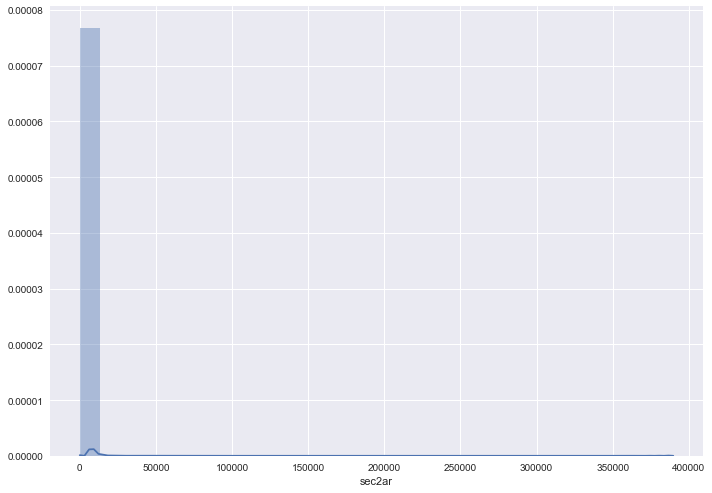

In [35]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values

sns.distplot(ems_calls['sec2ar'], bins=30)
plt.show()

In [36]:
# compute the pair wise correlation for all columns  
correlation_matrix = ems_calls.corr().round(2)

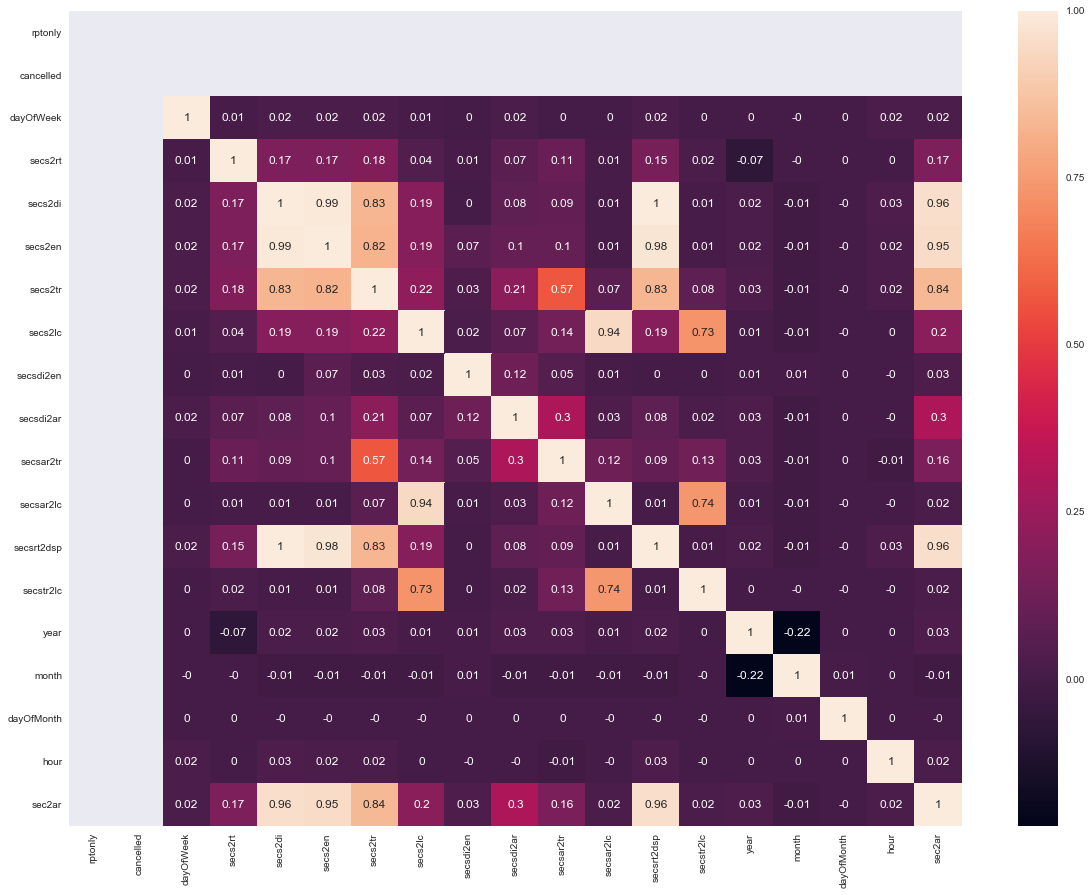

In [37]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

secsrt2dsp, secs2di, secs2en, (secsar2tr not using this since it is after arrival)

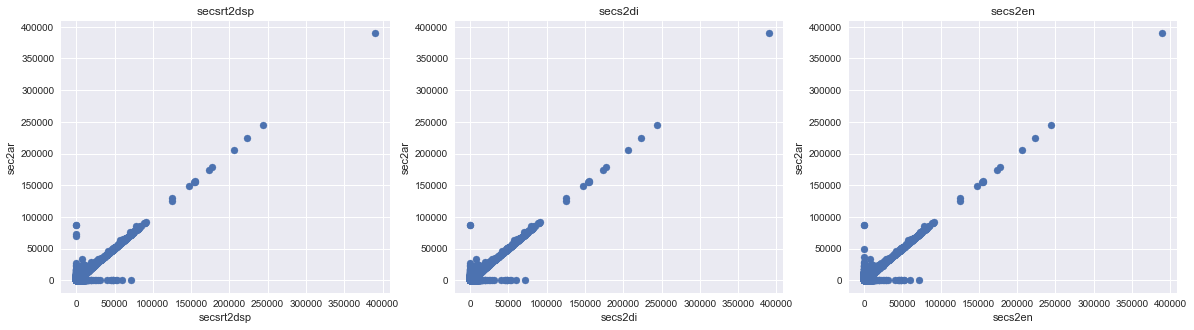

In [62]:
plt.figure(figsize=(20, 5))

features = ['secsrt2dsp', 'secs2di','secs2en']
target = ems_calls['sec2ar']

for i, col in enumerate(features):
    
    plt.subplot(1, len(features) , i+1)
    x = ems_calls[col]
    y = target
    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('sec2ar')

In [63]:
# IQR
iqr_ems_f = ems_calls["sec2ar"].quantile(0.75) - ems_calls["sec2ar"].quantile(0.25)
iqr_ems_f
339.0

# median
median_size_ems_f = ems_calls["sec2ar"].quantile(0.50)
median_size_ems_f

# lower outlier bound
lower_outlier_bound_ems_f = ems_calls["sec2ar"].quantile(0.25) - 1.5 * iqr_ems
lower_outlier_bound_ems_f

# upper outlier bound
upper_outlier_boud_ems_f = ems_calls["sec2ar"].quantile(0.75) +  1.5 * iqr_ems
upper_outlier_boud_ems_f

# new data range after outlier has been removed
ems_outlier_removed_f = ems_calls[(ems_calls['sec2ar'] > lower_outlier_bound_ems) & (ems_calls['sec2ar'] < upper_outlier_boud_ems) ]
ems_outlier_removed_f

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour,sec2ar
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0,571
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0,915
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,2295,29,1267,M211,SICK PERSON,2012,7,1,0,306
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,2090,17,1323,M221,CHEST PAIN,2012,7,1,0,340
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0,689
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,2015,37,1585,MA32,SICK PERSON,2012,7,1,0,323
19,E911,G,1,False,EMS,EMS,B3A,301,M251,False,...,3943,9,2624,M251,HEART PROBLEMS,2012,7,1,1,575
20,PHONE,G,5,False,EMS,EMS,B4A,401,MA32,False,...,3141,605,1862,MA32,CONVALESCENT TRANSPORT,2012,7,1,1,717
22,E911,G,3,False,EMS,EMS,B1,108,M211,False,...,1691,21,1128,M211,ASSAULT / RAPE,2012,7,1,1,692


In [64]:
ems_outlier_removed_f.head()

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour,sec2ar
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0,571
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0,915
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,2295,29,1267,M211,SICK PERSON,2012,7,1,0,306
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,2090,17,1323,M221,CHEST PAIN,2012,7,1,0,340


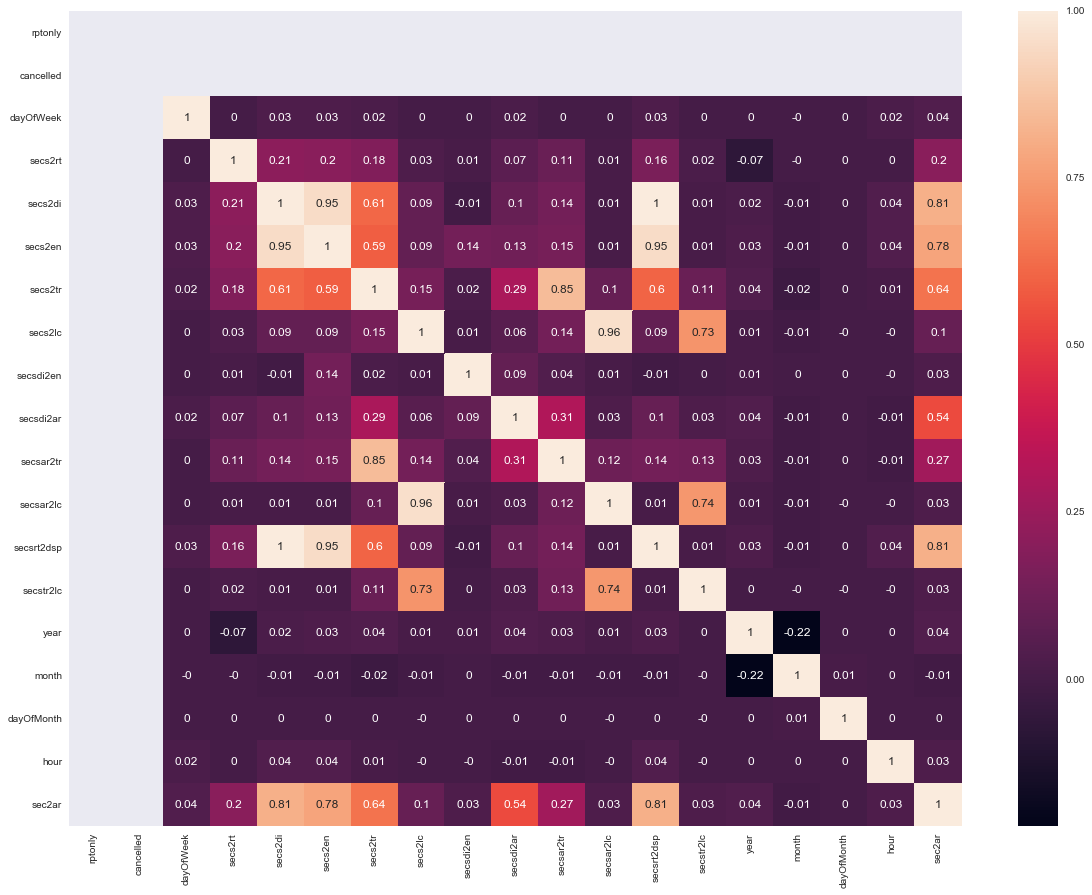

In [67]:
# compute the pair wise correlation for all columns  
correlation_matrix = ems_outlier_removed_f.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

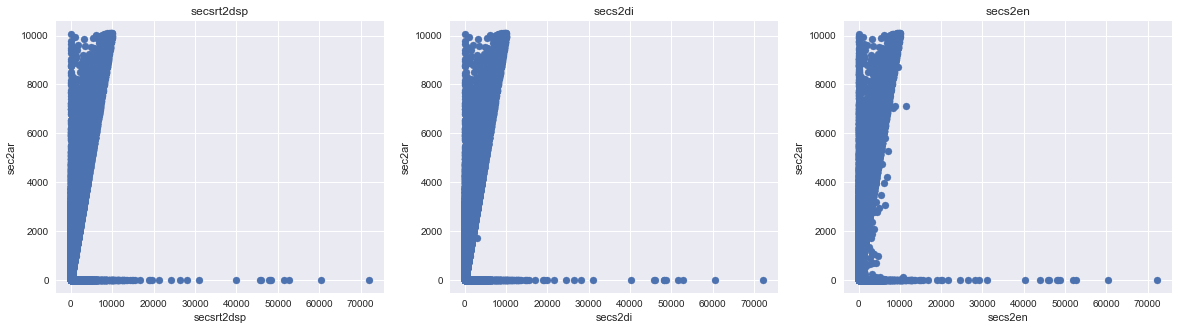

In [68]:
plt.figure(figsize=(20, 5))

features = ['secsrt2dsp', 'secs2di','secs2en']
target = ems_outlier_removed_f['sec2ar']

for i, col in enumerate(features):
    
    plt.subplot(1, len(features) , i+1)
    x = ems_outlier_removed_f[col]
    y = target
    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('sec2ar')

**1.2 Prepare the data for training**

In [71]:
X_ems = pd.DataFrame(np.c_[ems_outlier_removed_f['secsrt2dsp'], ems_outlier_removed_f['secs2di'], ems_outlier_removed_f['secs2en']], columns = ['secsrt2dsp','secs2di','secs2en'])
Y_ems = ems_outlier_removed_f['sec2ar']

**1.3 Create Validation Data - Split the data into training and testing set**

In [72]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

X_ems_train, X_ems_test, Y_ems_train, Y_ems_test = train_test_split(X_ems, Y_ems, test_size = 0.2, random_state=5)
print(X_ems_train.shape)
print(X_ems_test.shape)
print(Y_ems_train.shape)
print(Y_ems_test.shape)

(379489, 3)
(94873, 3)
(379489,)
(94873,)


**1.4. Train the model using sklearn LinearRegression**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_ems_train, Y_ems_train)
Y_ems_pred = lin_model.predict(X_ems_test)

**1.5 Evaluate model** - Use R2 and RMSE scores for the training and validation data

In [74]:
# model evaluation for training set

y_ems_train_predict = lin_model.predict(X_ems_train)
rmse_ems_train = (np.sqrt(mean_squared_error(Y_ems_train, y_ems_train_predict)))
r2_ems_train = r2_score(Y_ems_train, y_ems_train_predict)


# model evaluation for testing set

y_ems_test_predict = lin_model.predict(X_ems_test)
rmse_ems_test = (np.sqrt(mean_squared_error(Y_ems_test, y_ems_test_predict)))
r2_ems_test = r2_score(Y_ems_test, y_ems_test_predict)


# root mean square error of the model
print("Model performance:")
print("\n")


print("--------------------------------------")
print('RMSE for training set is {}'.format(rmse_ems_train))

print('RMSE for test set is {}'.format(rmse_ems_test))

# r-squared score of the model


print("--------------------------------------")
print('R2 score for traing set is {}'.format(r2_ems_train))

print('R2 score for test set is {}'.format(r2_ems_test))
print("\n")


Model performance:


--------------------------------------
RMSE for training set is 463.50672450636887
RMSE for test set is 497.1714637399286
--------------------------------------
R2 score for traing set is 0.6727358111758639
R2 score for test set is 0.6065139722072246




**1.6 Prediction**

In [ ]:

Y_ems_pred.predict()

## 2. gcf_calls
** Target is second to first arrival, secs2ar, that is when the 1st responsder 1st arrive at the scence**

**2.1 Visualization**

**2.5 Evaluate model** - Use R2 and RMSE scores for the training and validation data

In [14]:
gcf_calls.head()

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
4,E911,W,P,False,FIRE,GCF,ALAM,44C,E44,False,...,0,900,8,0,E44,SEIZURES-CONVULSIONS,2012,7,1,0
15,E911,G,P,False,FIRE,GCF,PCSF,24B,E24,False,...,0,1058,14,0,E24,BREATHING PROBLEMS,2012,7,1,0
18,SELF,SU,7,False,FIRE,GCF,SMFD,29B,DC9,False,...,0,205,0,0,DC9,CITIZEN ASSIST / SERVICE CALL,2012,7,1,0
24,XFER,ALAM,2,False,FIRE,GCF,NaN,NaN,C231,False,...,0,20029,152,0,C231,MUTUAL AID,2012,7,1,2
26,PHONE,ALAM,2,False,FIRE,GCF,NaN,NaN,E38,False,...,0,34724,147,0,E38,MUTUAL AID,2012,7,1,2


In [16]:
# check for missing values in all the columns
gcf_calls.isnull().sum()

callsource      0
city          148
priority        3
rptonly         0
service         0
agency          0
district      603
gp            878
primeunit      45
cancelled       0
closecode       0
dayOfWeek       0
secs2rt         0
secs2di         0
secs2en         0
secs2ar         0
secs2tr         0
secs2lc         0
secsdi2en       0
secsdi2ar       0
secsar2tr       0
secsar2lc       0
secsrt2dsp      0
secstr2lc       0
firstdisp     140
nature          0
year            0
month           0
dayOfMonth      0
hour            0
dtype: int64

In [17]:
# move secs to the end and remaned to sec2ar
gcf_calls['sec2ar'] = gcf_calls.apply(lambda row: row.secs2ar, axis=1)
gcf_calls.drop(columns = ['secs2ar'], inplace=True)
gcf_calls

C:\Users\ltran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ltran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour,sec2ar
4,E911,W,P,False,FIRE,GCF,ALAM,44C,E44,False,...,900,8,0,E44,SEIZURES-CONVULSIONS,2012,7,1,0,685
15,E911,G,P,False,FIRE,GCF,PCSF,24B,E24,False,...,1058,14,0,E24,BREATHING PROBLEMS,2012,7,1,0,278
18,SELF,SU,7,False,FIRE,GCF,SMFD,29B,DC9,False,...,205,0,0,DC9,CITIZEN ASSIST / SERVICE CALL,2012,7,1,0,0
24,XFER,ALAM,2,False,FIRE,GCF,NaN,NaN,C231,False,...,20029,152,0,C231,MUTUAL AID,2012,7,1,2,899
26,PHONE,ALAM,2,False,FIRE,GCF,NaN,NaN,E38,False,...,34724,147,0,E38,MUTUAL AID,2012,7,1,2,1064
54,E911,W,P,False,FIRE,GCF,MTHP,38A,S38,False,...,1580,55,0,S38,SICK PERSON,2012,7,1,4,188
63,PHONE,COL,2,False,FIRE,GCF,CLFX,26D,E26,False,...,1365,57,0,E26,ALARMS,2012,7,1,4,387
77,PHONE,SU,P,False,FIRE,GCF,SMFD,29B,E29,False,...,31,31,0,E29,UNKNOWN PROBLEM MAN DOWN,2012,7,1,5,395
85,PHONE,ROCK,1,False,FIRE,GCF,STKD,12D,B12,False,...,950,15,0,B12,OUTSIDE FIRE,2012,7,1,7,538
86,PHONE,COL,2,False,FIRE,GCF,CLFX,26D,E26,False,...,1620,68,0,E26,ALARMS,2012,7,1,7,367


C:\Users\ltran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


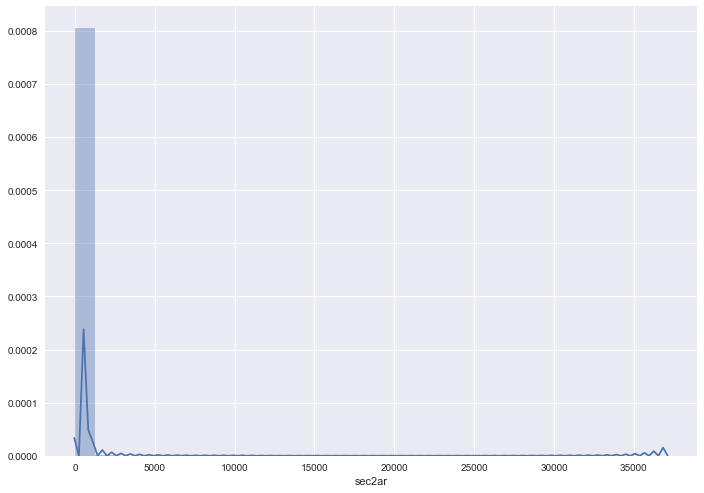

In [18]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values

sns.distplot(gcf_calls['sec2ar'], bins=30)
plt.show()

In [21]:
# compute the pair wise correlation for all columns  
correlation_matrix = gcf_calls.corr().round(2)

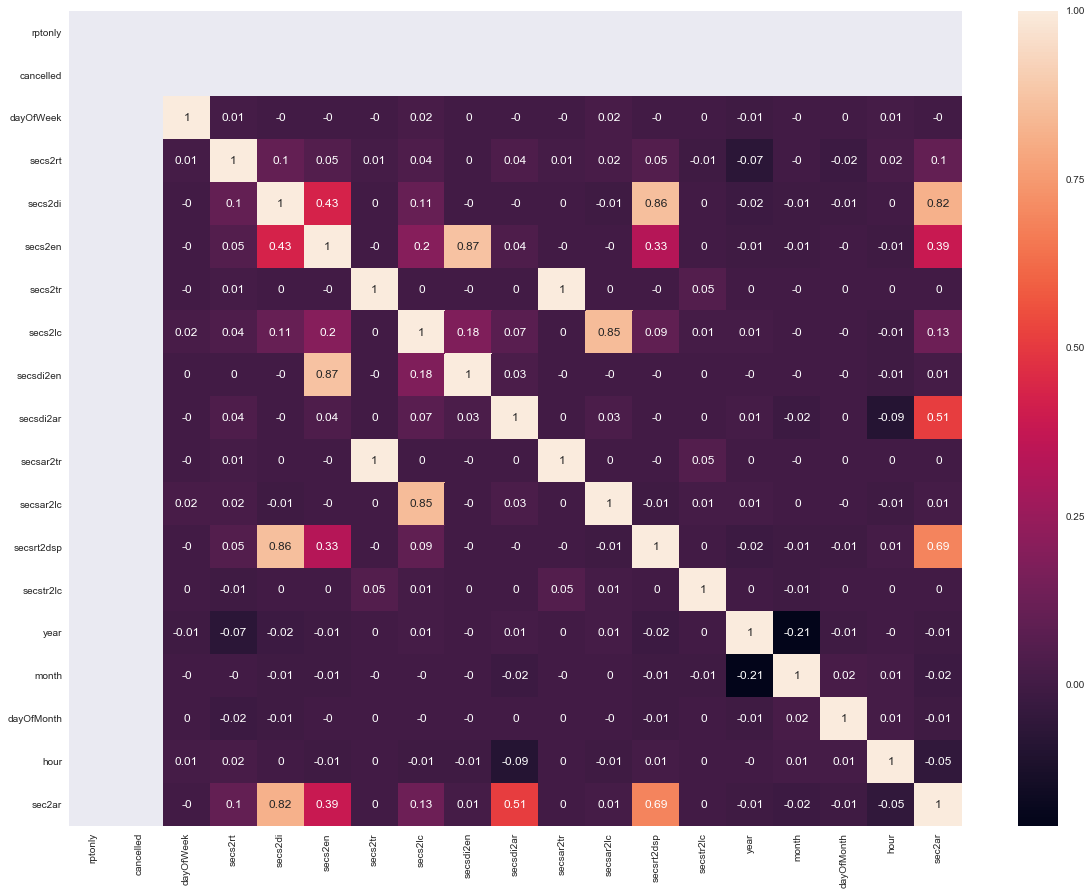

In [22]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

secsrt2dsp, secs2di, secs2en, (note: secsar2tr has 0 correlation since there is not transport)

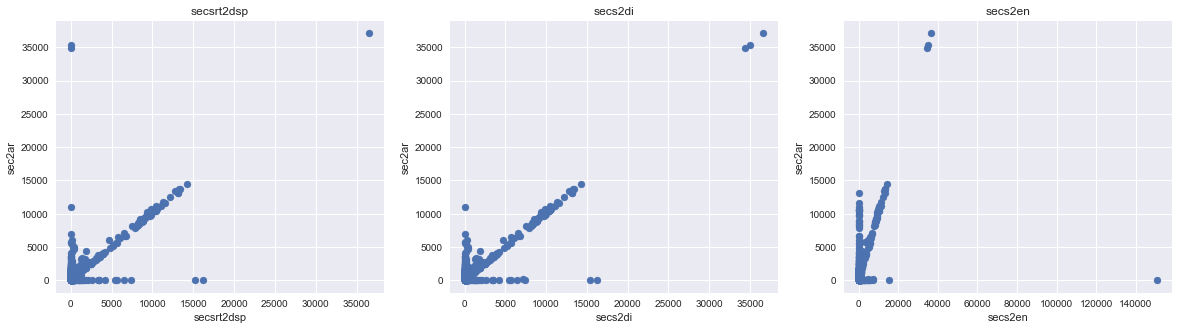

In [23]:
plt.figure(figsize=(20, 5))

features = ['secsrt2dsp', 'secs2di','secs2en']
target = gcf_calls['sec2ar']

for i, col in enumerate(features):
    
    plt.subplot(1, len(features) , i+1)
    x = gcf_calls[col]
    y = target
    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('sec2ar')

**2.2 Prepare the data for training**

In [24]:
X_gcf = pd.DataFrame(np.c_[gcf_calls['secsrt2dsp'], gcf_calls['secs2di'], gcf_calls['secs2en']], columns = ['secsrt2dsp','secs2di','secs2en'])
Y_gcf = gcf_calls['sec2ar']

**2.3 Create Validation Data - Split the data into training and testing set**

In [26]:
from sklearn.model_selection import train_test_split
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

X_gcf_train, X_gcf_test, Y_gcf_train, Y_gcf_test = train_test_split(X_gcf, Y_gcf, test_size = 0.2, random_state=5)
print(X_gcf_train.shape)
print(X_gcf_test.shape)
print(Y_gcf_train.shape)
print(Y_gcf_test.shape)

(64985, 3)
(16247, 3)
(64985,)
(16247,)


**2.4. Train the model using sklearn LinearRegression**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_gcf_model = LinearRegression()
lin_gcf_model.fit(X_gcf_train, Y_gcf_train)
Y_gcf_pred = lin_gcf_model.predict(X_gcf_test)

**2.5 Evaluate model** - Use R2 and RMSE scores for the training and validation data

In [29]:
# model evaluation for training set

y_gcf_train_predict = lin_gcf_model.predict(X_gcf_train)
rmse_gcf_train = (np.sqrt(mean_squared_error(Y_gcf_train, y_gcf_train_predict)))
r2_gcf_train = r2_score(Y_gcf_train, y_gcf_train_predict)


# model evaluation for testing set

y_gcf_test_predict = lin_gcf_model.predict(X_gcf_test)
rmse_gcf_test = (np.sqrt(mean_squared_error(Y_gcf_test, y_gcf_test_predict)))
r2_gcf_test = r2_score(Y_gcf_test, y_gcf_test_predict)


# root mean square error of the model
print("Model performance:")
print("\n")


print("--------------------------------------")
print('RMSE for training set is {}'.format(rmse_gcf_train))

print('RMSE for test set is {}'.format(rmse_gcf_test))

# r-squared score of the model


print("--------------------------------------")
print('R2 score for traing set is {}'.format(r2_gcf_train))

print('R2 score for test set is {}'.format(r2_gcf_test))
print("\n")


Model performance:


--------------------------------------
RMSE for training set is 203.0023510839283
RMSE for test set is 272.7883912481031
--------------------------------------
R2 score for traing set is 0.6775274280255461
R2 score for test set is 0.682715304550077


